# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [4]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [5]:
Currency_Pair = 'GBPUSD'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

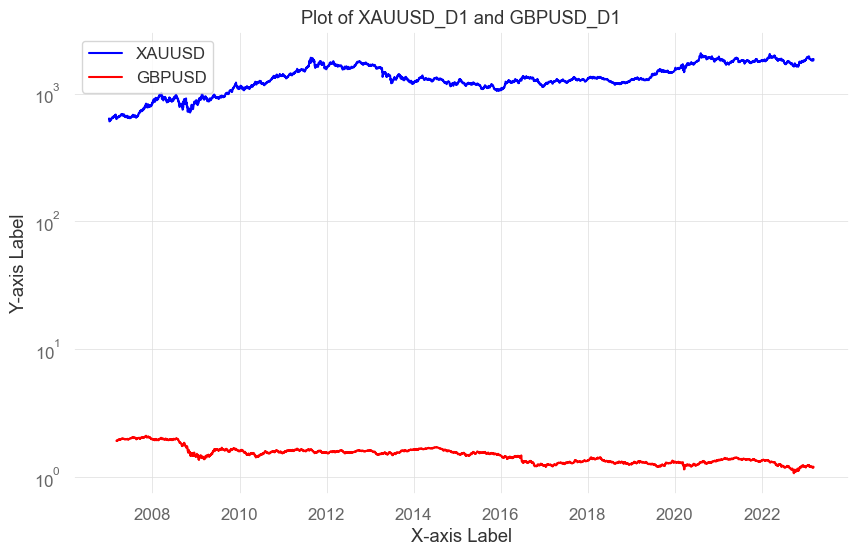

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          3.946e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:51:14   Log-Likelihood:                         -37836.
No. Observations:                5003   AIC:                                  7.567e+04
Df Residuals:                    5002   BIC:                                  7.568e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.0557      4.360    198.653      0.000     857.509     874.603
==============================================================================
Omnibus:                      212.289   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.695
Skew:                          -0.536   Prob(JB):                     8.93e-53
Kurtosis:                       3.027   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run()

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.900502
Multiple (Buy-and-Hold):     3.702206
--------------------------------------
Out-/Underperformance:       -2.801704


CAGR:                        -0.006533
Annualized Mean:             -0.006555
Annualized Std:              0.025395
Sharpe Ratio:                -0.258109
Sortino Ratio:               -0.349089
Maximum Drawdown:            0.149206
Calmar Ratio:                -0.043787
Max Drawdown Duration:       5840 Days
Kelly Criterion:             -9.673469


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.41%
CAGR﹪                     -0.47%

Sharpe                     -0.23
Prob. Sharpe Ratio         14.99%
Smart Sharpe               -0.23
Sortino                    -0.31
Smart Sortino              -0.31
Sortino/√2                 -0.22
Smart Sortino/√2           -0.22
Omega                      0.96

Max Drawdown               -15.12%
Longest DD Days            5727
Volatility (ann.)          2.28%
Calmar                     -0.03
Skew                       -0.67
Kurtosis                   8.55

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.64%
Kelly Criterion            -2.22%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-15.120158,-14.729929
2,2007-03-14,2007-04-20,2007-06-25,104,-0.487586,-0.487281
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046262,-0.020981


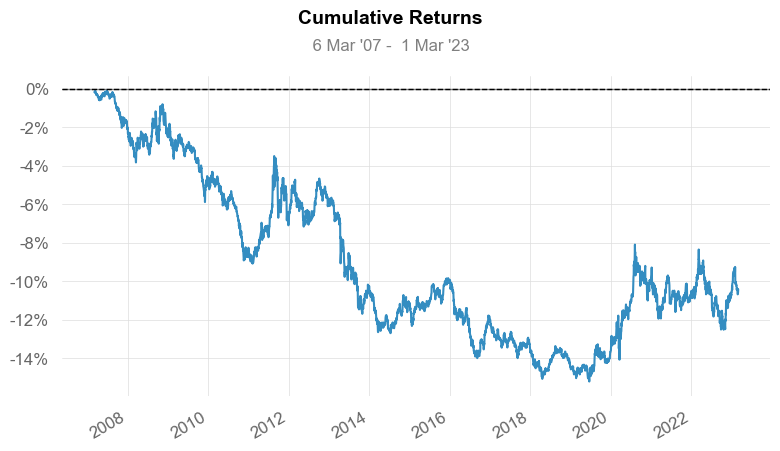

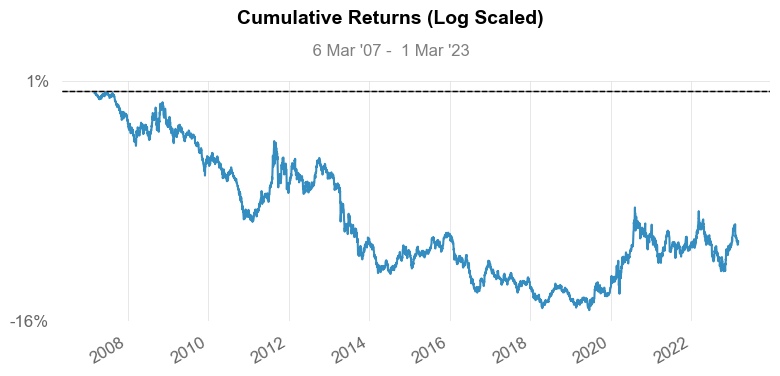

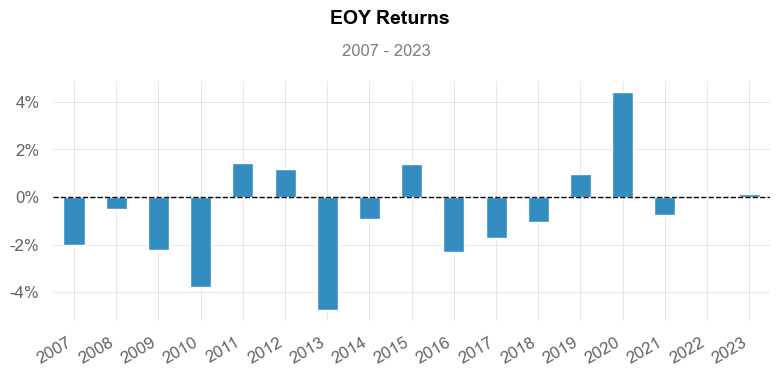

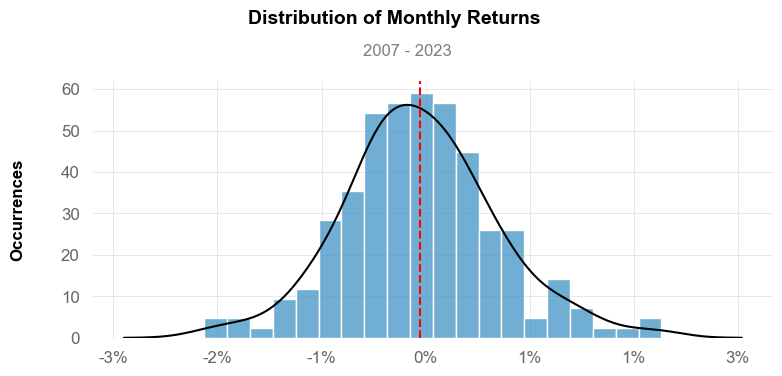

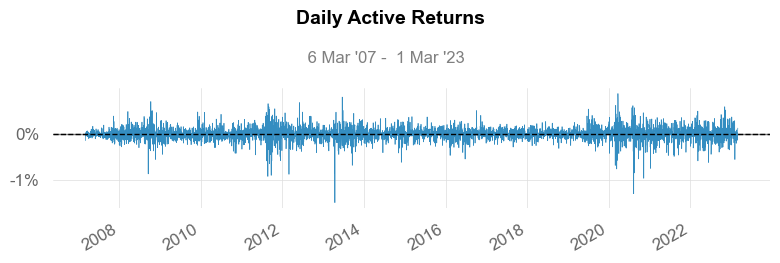

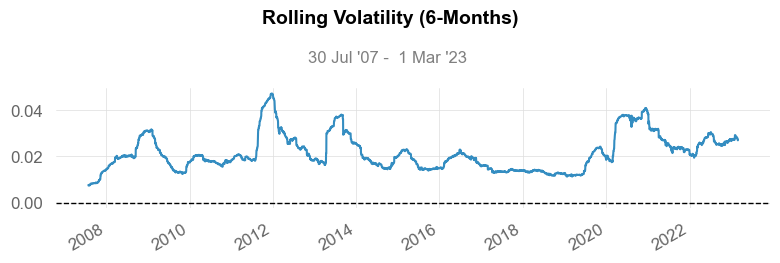

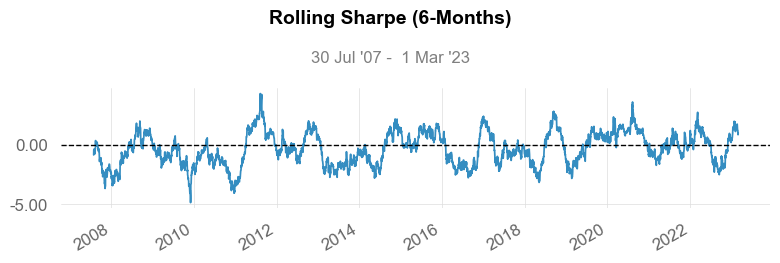

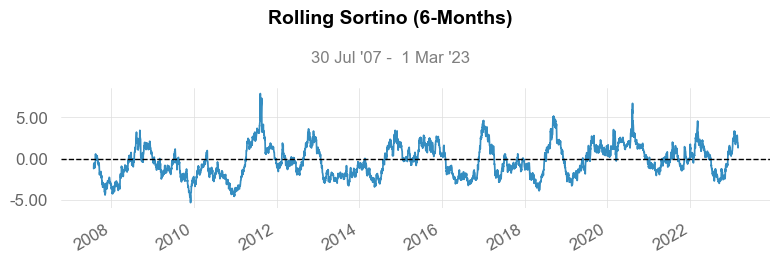

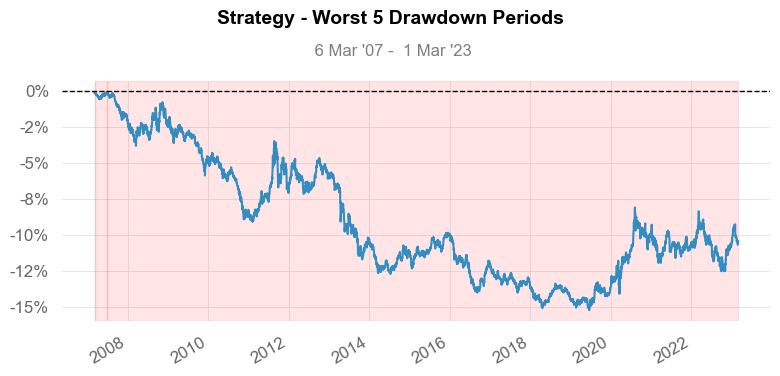

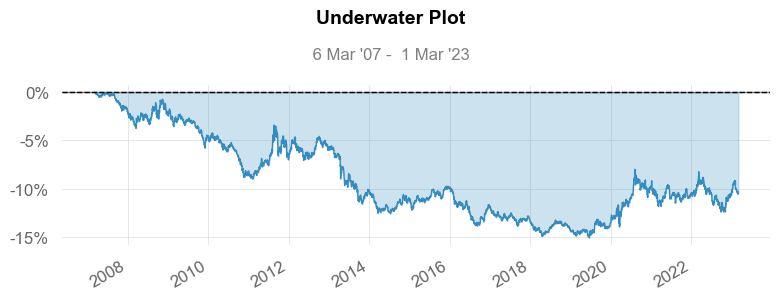

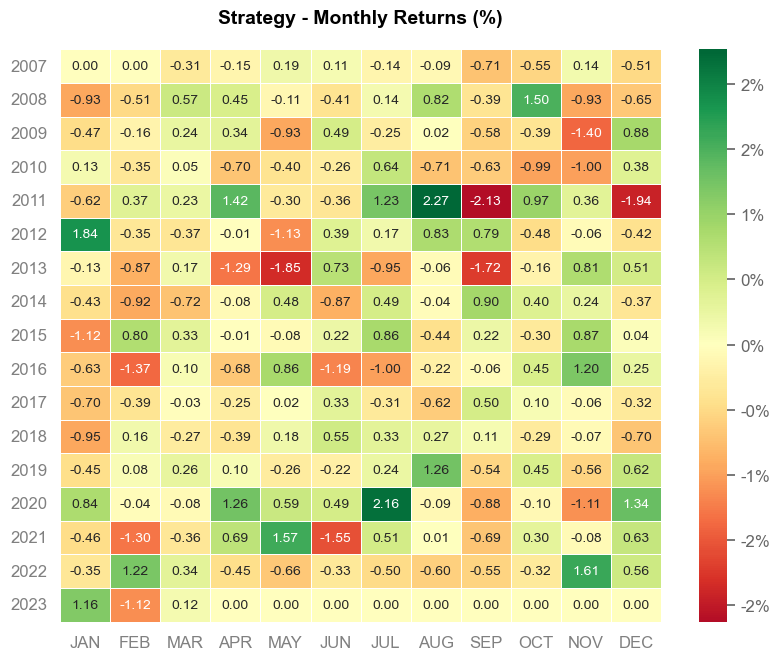

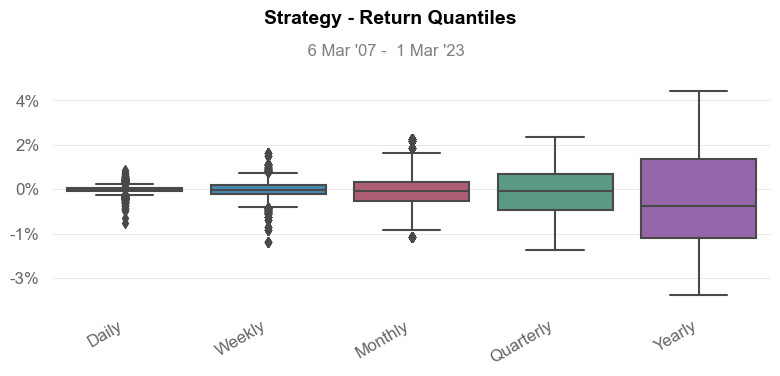

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [18]:
TF = 'H4'

In [19]:
data_1 = XAUUSD[TF]

In [20]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

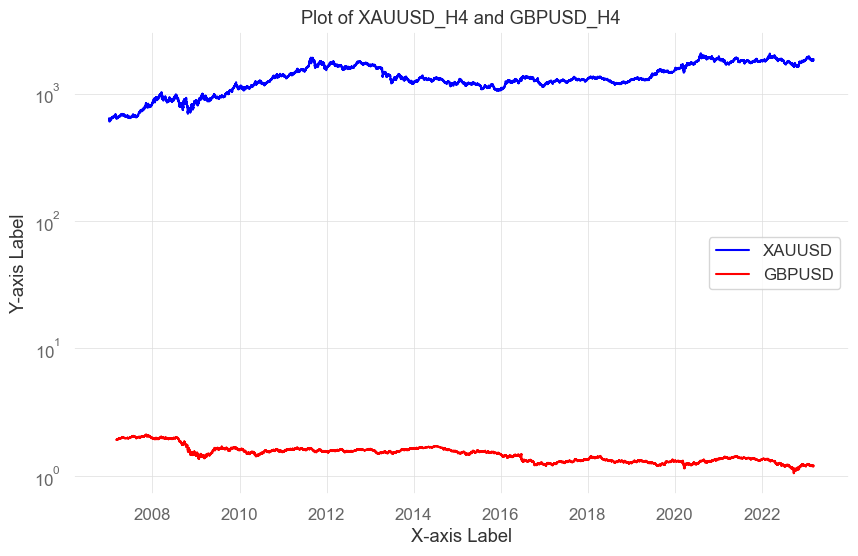

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [22]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [23]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          2.032e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:51:47   Log-Likelihood:                     -1.9516e+05
No. Observations:               25804   AIC:                                  3.903e+05
Df Residuals:                   25803   BIC:                                  3.903e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        865.7607      1.920    450.825      0.000     861.997     869.525
==============================================================================
Omnibus:                     1093.447   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1238.569
Skew:                          -0.537   Prob(JB):                    1.12e-269
Kurtosis:                       3.024   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result = KF.Run()

In [25]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.90661
Multiple (Buy-and-Hold):     3.652704
--------------------------------------
Out-/Underperformance:       -2.746094


CAGR:                        -0.006113
Annualized Mean:             -0.006132
Annualized Std:              0.024888
Sharpe Ratio:                -0.246382
Sortino Ratio:               -0.33997
Maximum Drawdown:            0.143924
Calmar Ratio:                -0.042475
Max Drawdown Duration:       5840 Days
Kelly Criterion:             -9.402646


### Save Result Backtest 

In [26]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [27]:
filename = f'{Currency_Pair}_{TF}.csv'

In [28]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.85%
CAGR﹪                     -0.45%

Sharpe                     -0.22
Prob. Sharpe Ratio         16.33%
Smart Sharpe               -0.22
Sortino                    -0.3
Smart Sortino              -0.3
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -14.55%
Longest DD Days            5727
Volatility (ann.)          2.27%
Calmar                     -0.03
Skew                       -0.66
Kurtosis                   8.62

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.61%
Kelly Criterion            -2.1%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive Wi

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-14.553860,-13.914855
2,2007-03-14,2007-04-20,2007-06-25,104,-0.487240,-0.486935
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046229,-0.020966


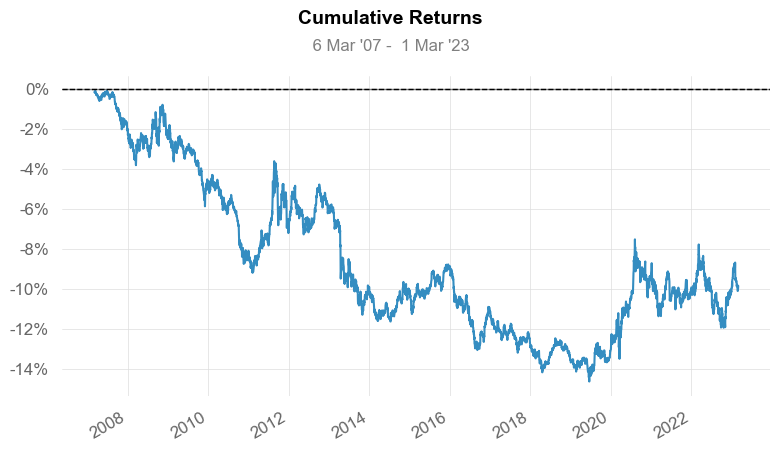

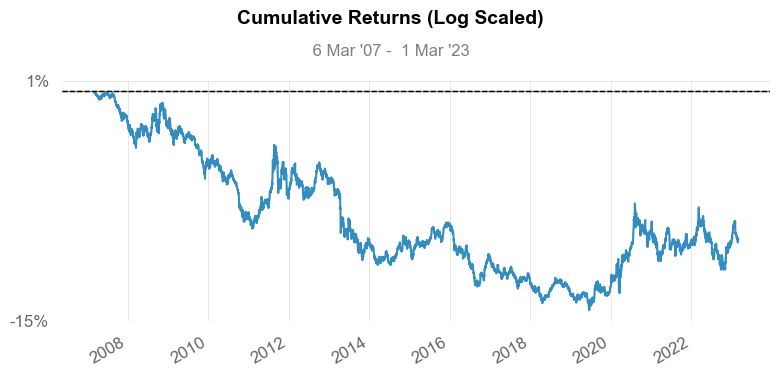

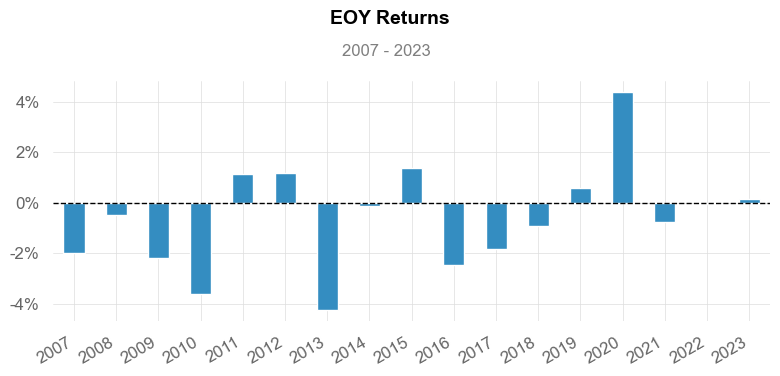

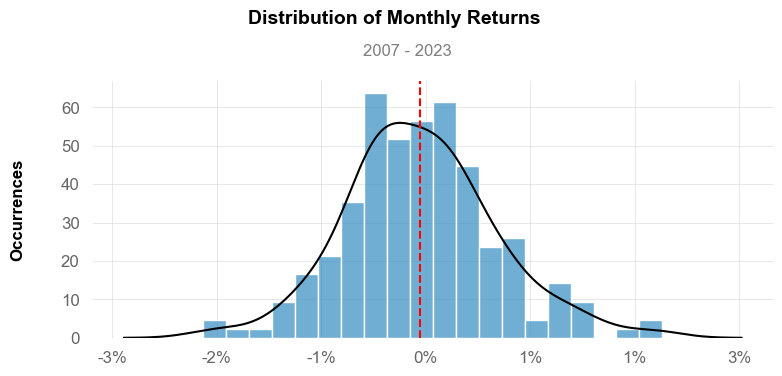

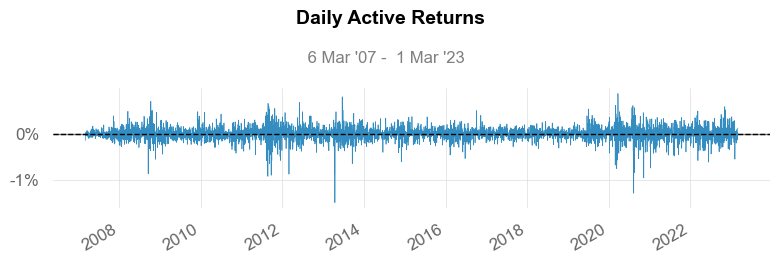

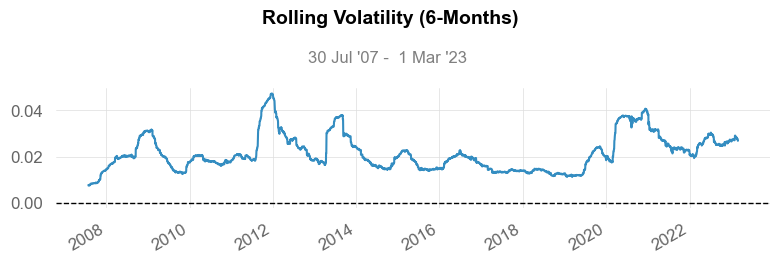

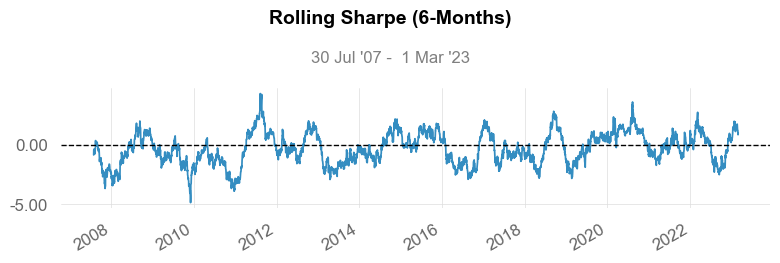

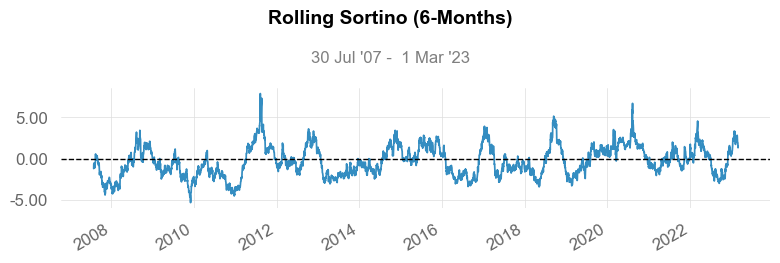

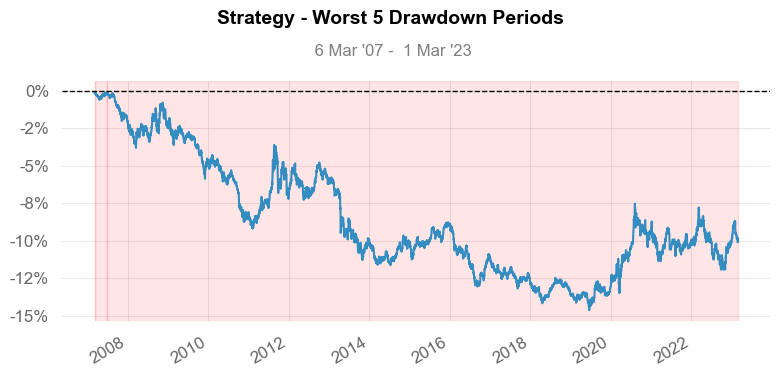

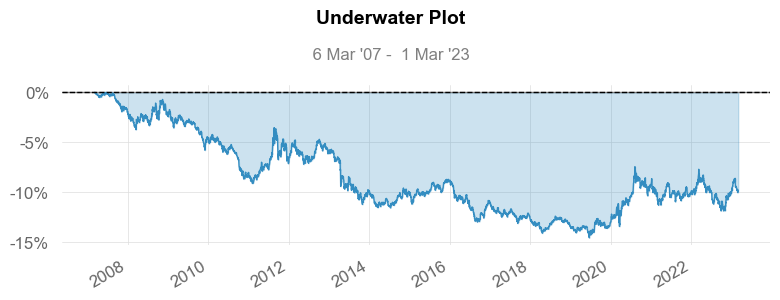

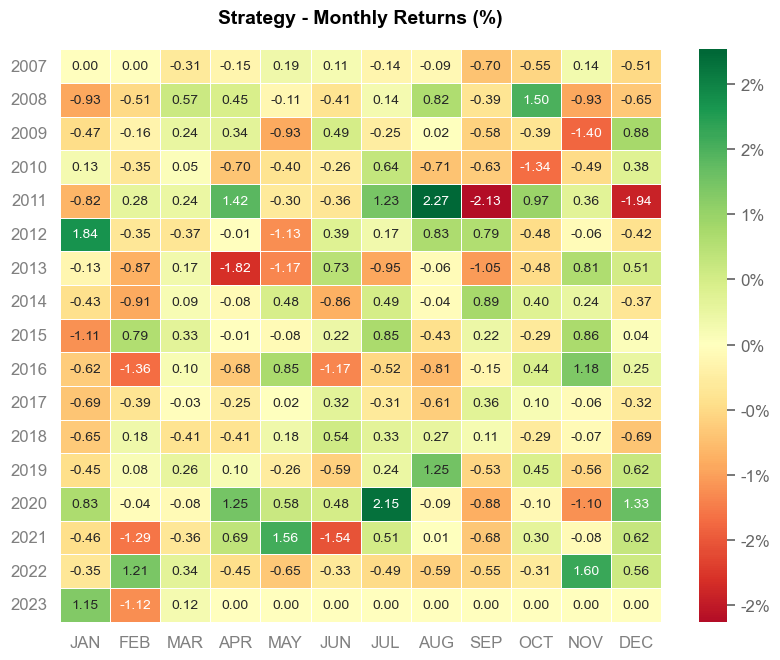

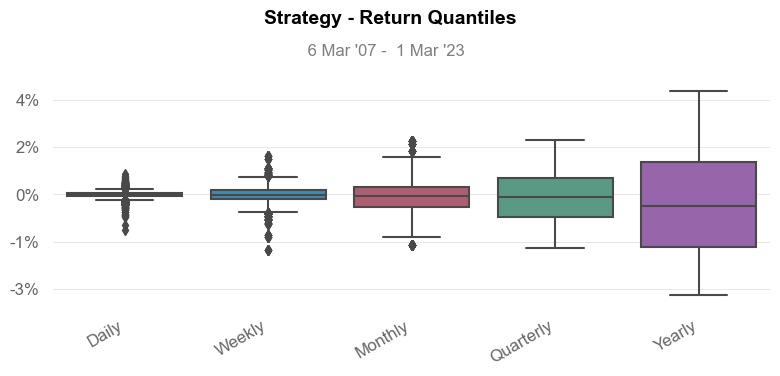

In [29]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [30]:
TF = 'H1'

In [31]:
data_1 = XAUUSD[TF]

In [32]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

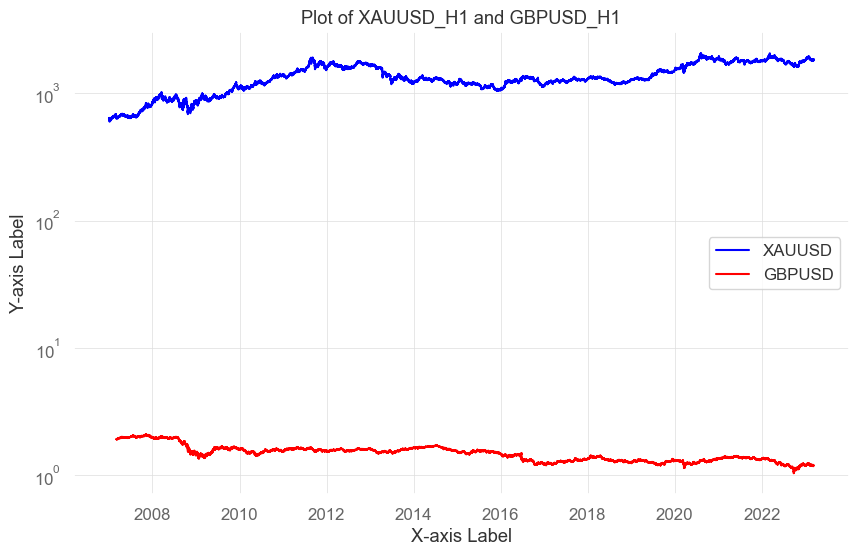

In [33]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [34]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [35]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          7.862e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:55:01   Log-Likelihood:                     -7.5516e+05
No. Observations:               99844   AIC:                                  1.510e+06
Df Residuals:                   99843   BIC:                                  1.510e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        865.6852      0.976    886.695      0.000     863.772     867.599
==============================================================================
Omnibus:                     4225.965   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4789.007
Skew:                          -0.536   Prob(JB):                         0.00
Kurtosis:                       3.024   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = KF.Run()

### Save Result Backtest 

In [37]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [38]:
filename = f'{Currency_Pair}_{TF}.csv'

In [39]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.8%
CAGR﹪                     -0.44%

Sharpe                     -0.22
Prob. Sharpe Ratio         16.47%
Smart Sharpe               -0.22
Sortino                    -0.3
Smart Sortino              -0.29
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -14.51%
Longest DD Days            5727
Volatility (ann.)          2.27%
Calmar                     -0.03
Skew                       -0.69
Kurtosis                   9.06

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.61%
Kelly Criterion            -2.08%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-14.506281,-13.883990
2,2007-03-14,2007-04-20,2007-06-25,104,-0.487240,-0.486935
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046229,-0.020966


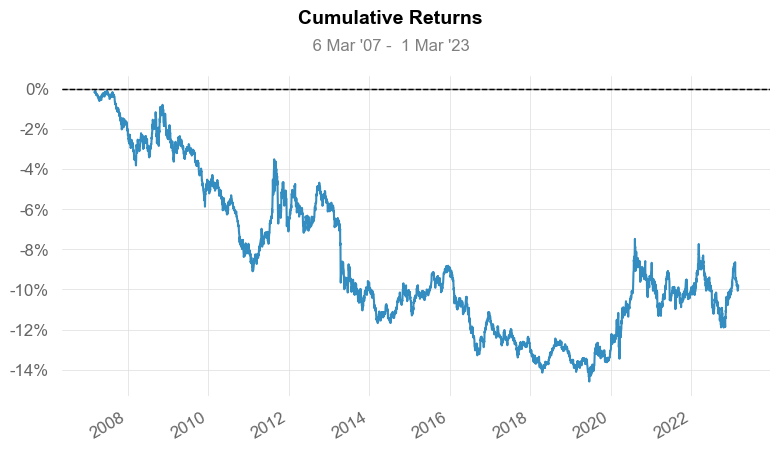

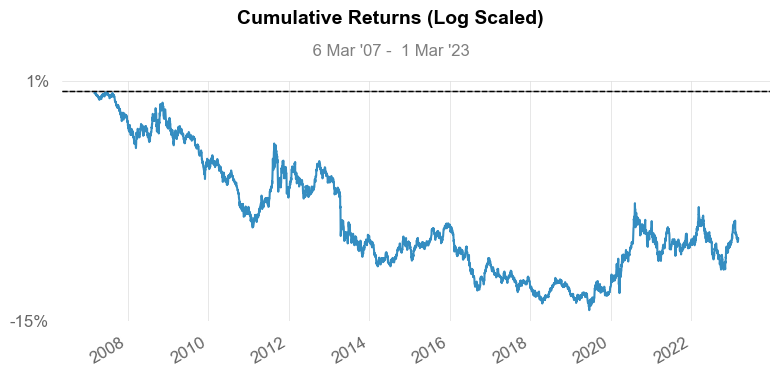

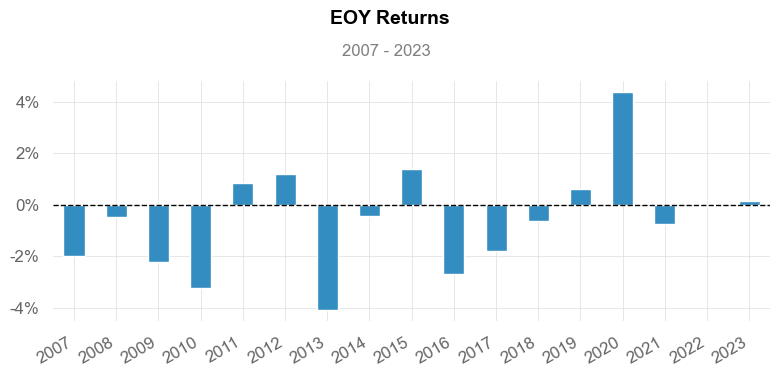

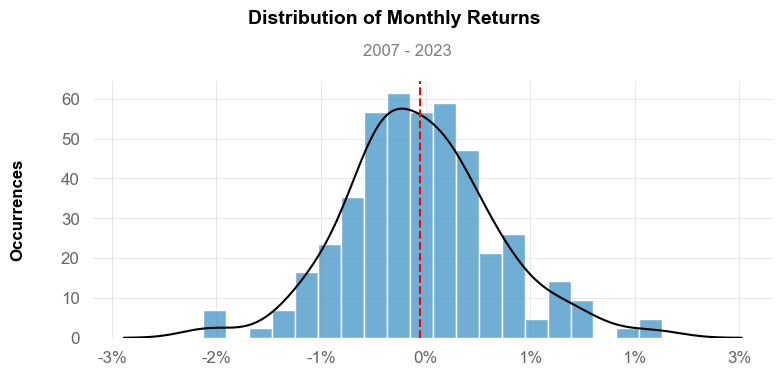

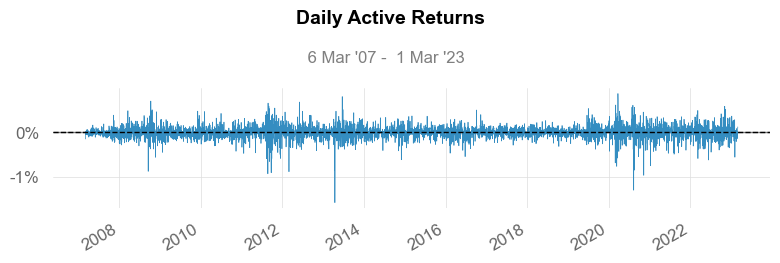

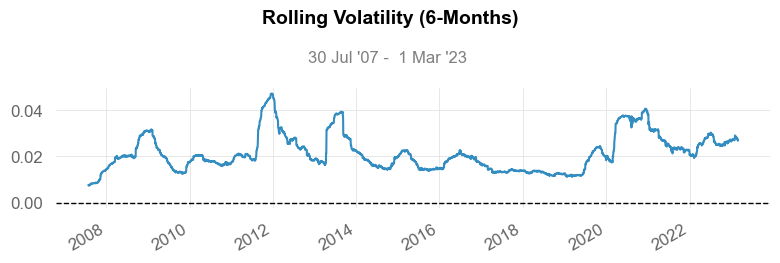

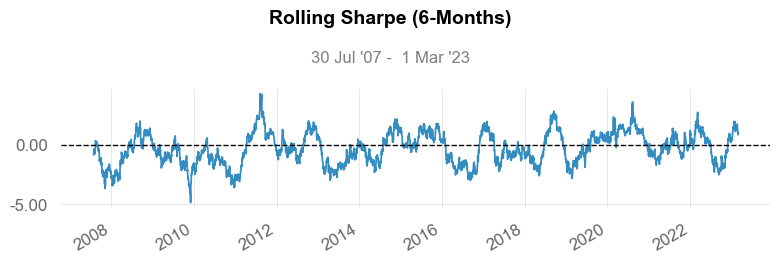

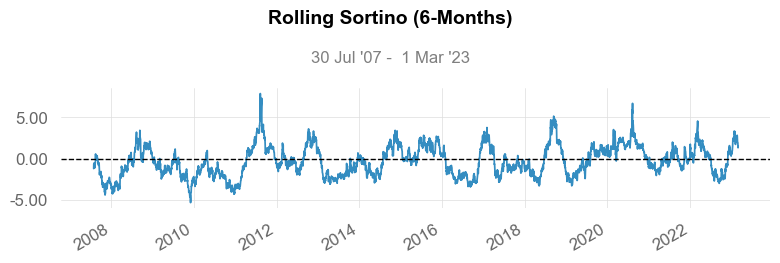

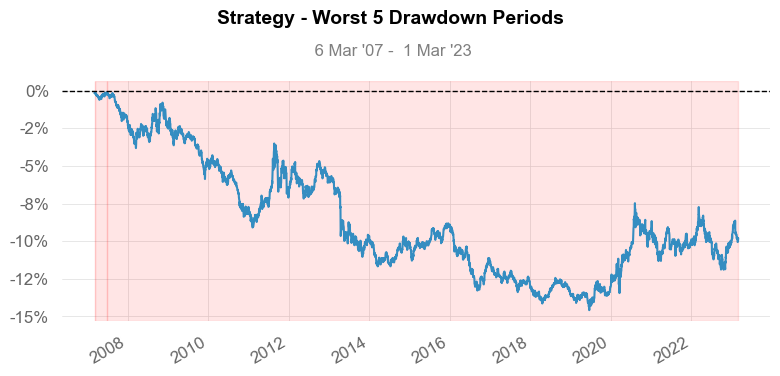

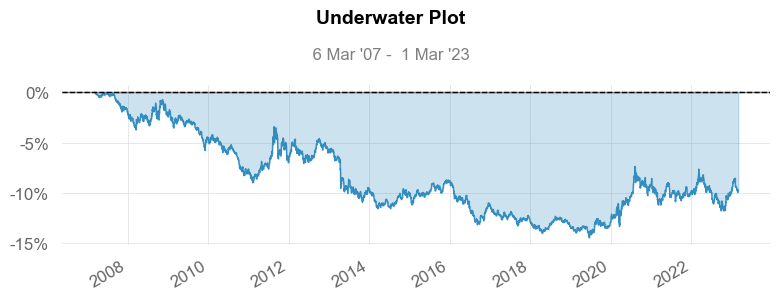

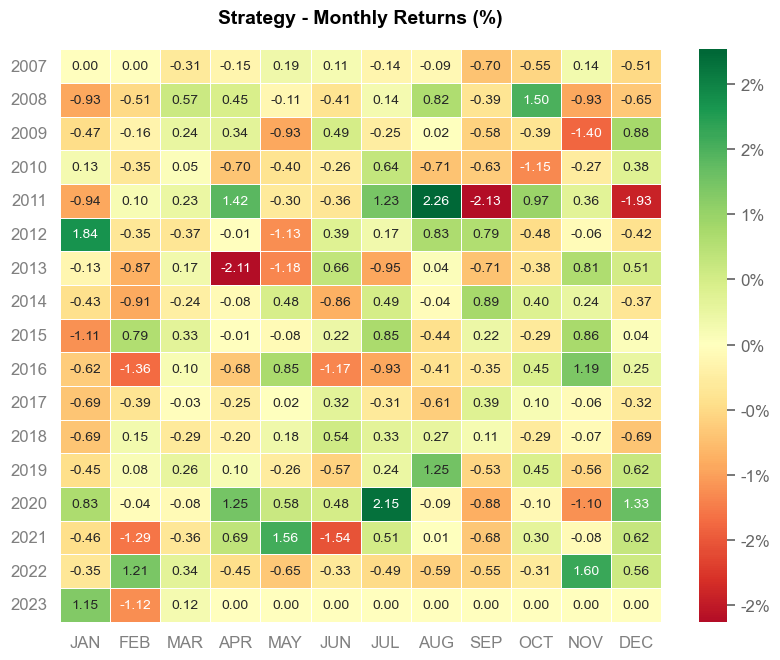

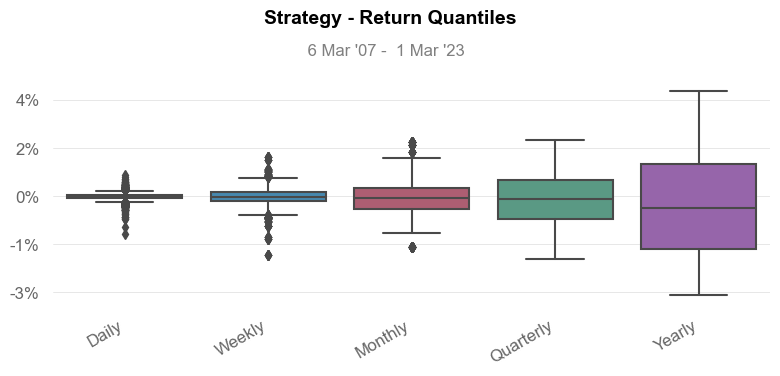

In [40]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [41]:
TF = 'M30'

In [42]:
data_1 = XAUUSD[TF]

In [43]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

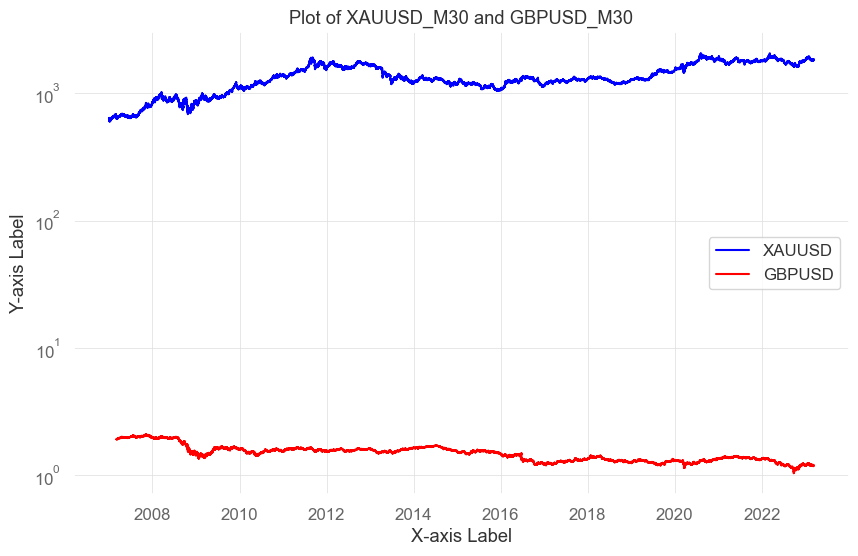

In [44]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [45]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [46]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          1.572e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        02:11:06   Log-Likelihood:                     -1.5102e+06
No. Observations:              199676   AIC:                                  3.020e+06
Df Residuals:                  199675   BIC:                                  3.020e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        865.6810      0.690   1253.932      0.000     864.328     867.034
==============================================================================
Omnibus:                     8450.875   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9577.741
Skew:                          -0.536   Prob(JB):                         0.00
Kurtosis:                       3.024   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result = KF.Run()

### Save Result Backtest 

In [48]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [49]:
filename = f'{Currency_Pair}_{TF}.csv'

In [50]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.26%
CAGR﹪                     -0.47%

Sharpe                     -0.23
Prob. Sharpe Ratio         15.38%
Smart Sharpe               -0.23
Sortino                    -0.31
Smart Sortino              -0.31
Sortino/√2                 -0.22
Smart Sortino/√2           -0.22
Omega                      0.96

Max Drawdown               -14.96%
Longest DD Days            5727
Volatility (ann.)          2.28%
Calmar                     -0.03
Skew                       -0.78
Kurtosis                   10.45

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.63%
Kelly Criterion            -2.19%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecuti

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-14.963980,-14.380964
2,2007-03-14,2007-04-20,2007-06-25,104,-0.487240,-0.486935
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046229,-0.020966


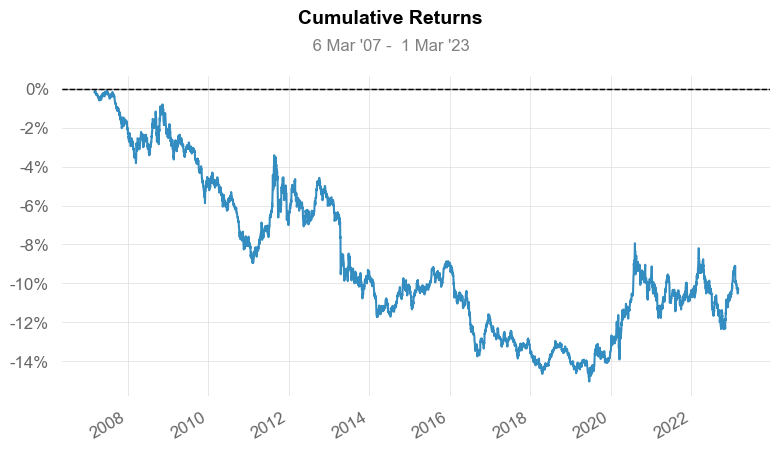

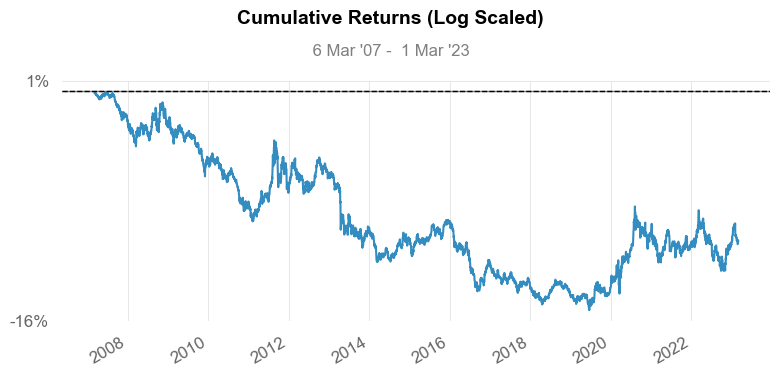

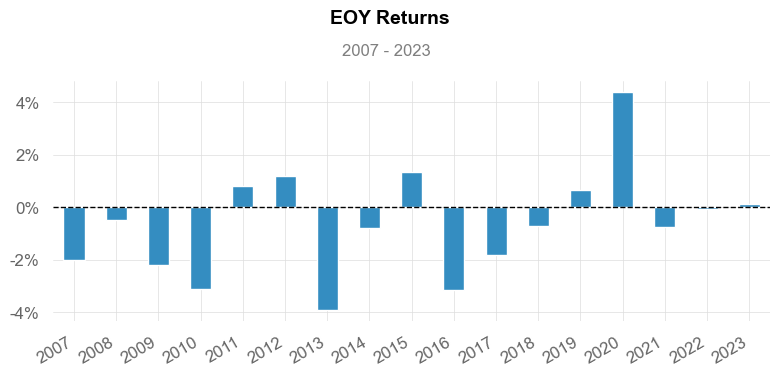

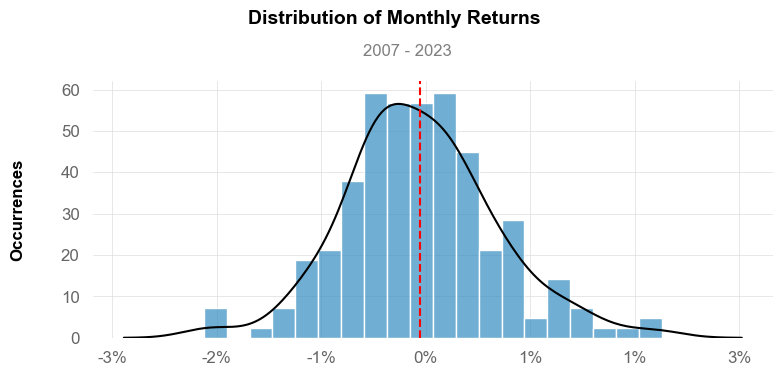

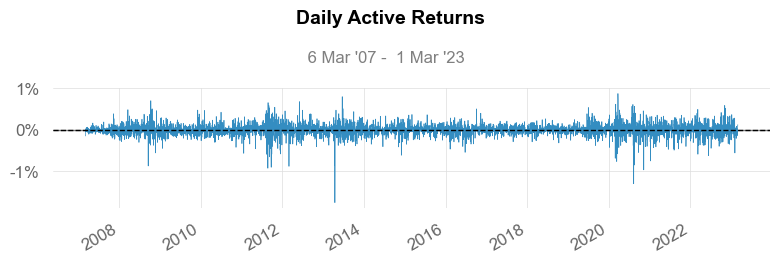

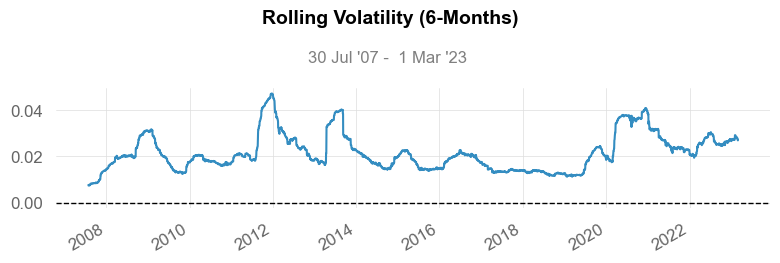

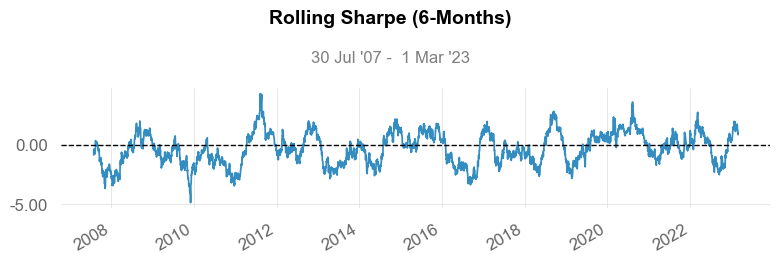

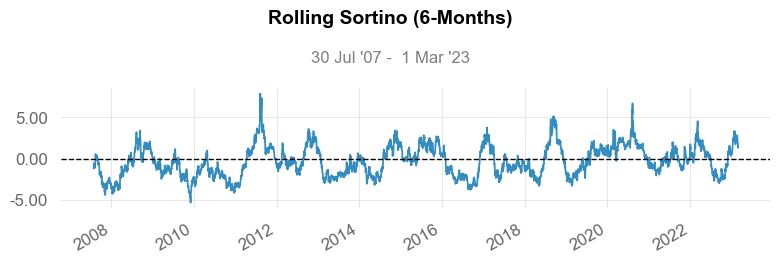

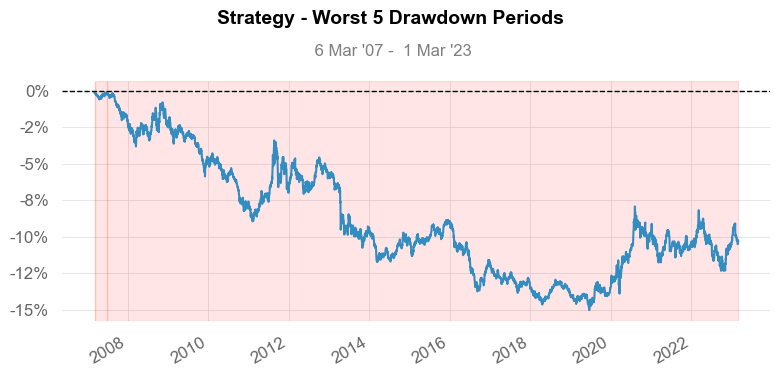

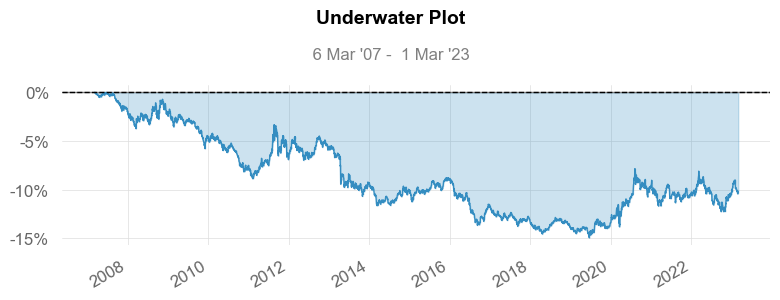

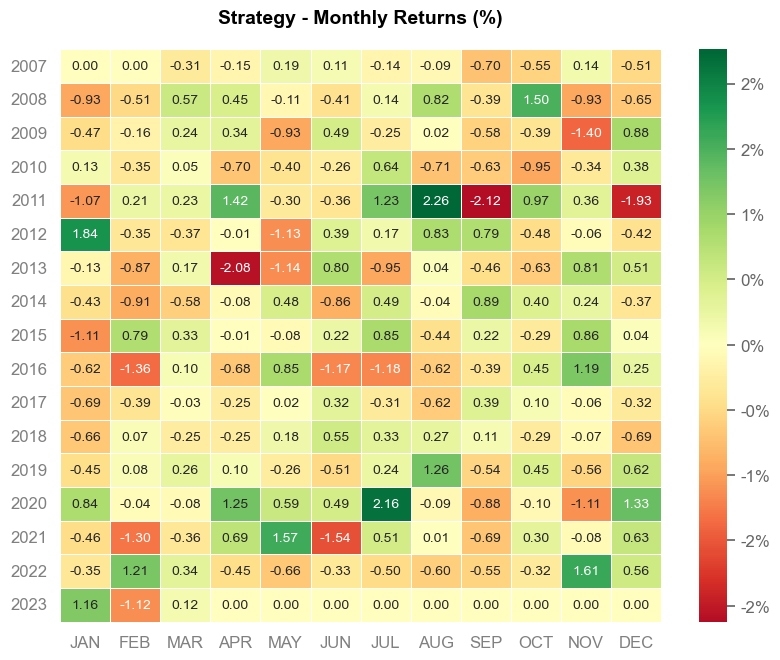

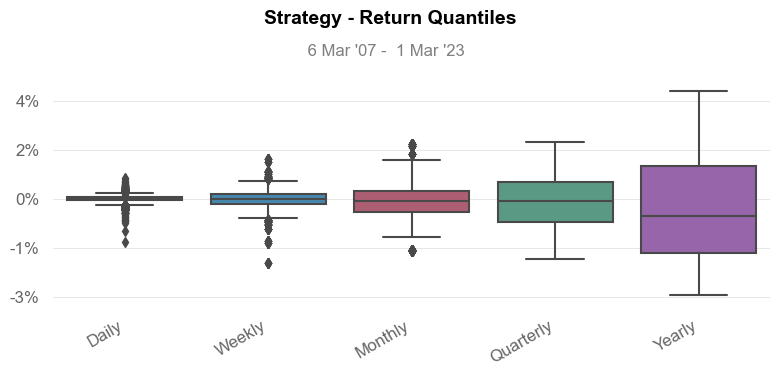

In [51]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())